# Analis de DataSet con Pandas y Jupyter


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Variable para leer el archivo


In [2]:
file = os.path.join(
    "files/18-proyecto-final-busaccidentsdata_d8d5ed5f-2ebe-4bb8-b89e-a9ad42b685e7.csv"
)

## Leer datos del CSV


In [3]:
df = pd.read_csv(
    file,
    encoding="latin1",
)
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


##  Numero total de registros


In [4]:
total_data = ["Route"]
df[total_data].describe()

,Route
count,23158
unique,612
top,OOS
freq,321


## Rutas Unicas


In [5]:
print("Rutas únicas:", len(df["Route"].unique()))

Rutas únicas: 612


In [6]:
ruutesUnique = pd.DataFrame(df["Route"].unique(), columns=["Route"])

In [7]:
ruutesUnique.head()

,Route
0,1
1,4
2,5
3,6
4,8


## Numero total de operadores

In [8]:
operatorNum = len(df['Operator'].unique())
operatorNum

25

In [9]:
operator = pd.DataFrame(df['Operator'].unique(), columns=['Operator'])
operator[0:10]

,Operator
0,London General
1,Metroline
2,East London
3,Selkent
4,London United
5,London Central
6,Metroline West
7,Tower Transit
8,Arriva London North
9,Abellio London


### Operador por ruta

In [10]:
operatorRouteNum = df.groupby("Operator")["Route"].count()
operatorRouteNum = pd.DataFrame(operatorRouteNum)
operatorRouteNum = operatorRouteNum.rename(columns={"Route": "Num_Routes"})

In [11]:
operatorQuantityRoute = pd.merge(operator, operatorRouteNum, on="Operator")
operatorQuantityRoute = operatorRouteNum.sort_values(by=["Num_Routes"], ascending=False)
operatorQuantityRoute

,Num_Routes
Operator,
Metroline,3457
Arriva London North,3208
East London,2402
London United,2263
Selkent,1808
Arriva London South,1743
London General,1723
London Central,1367
Metroline West,1232


### Grafica de los operadores y accidentes

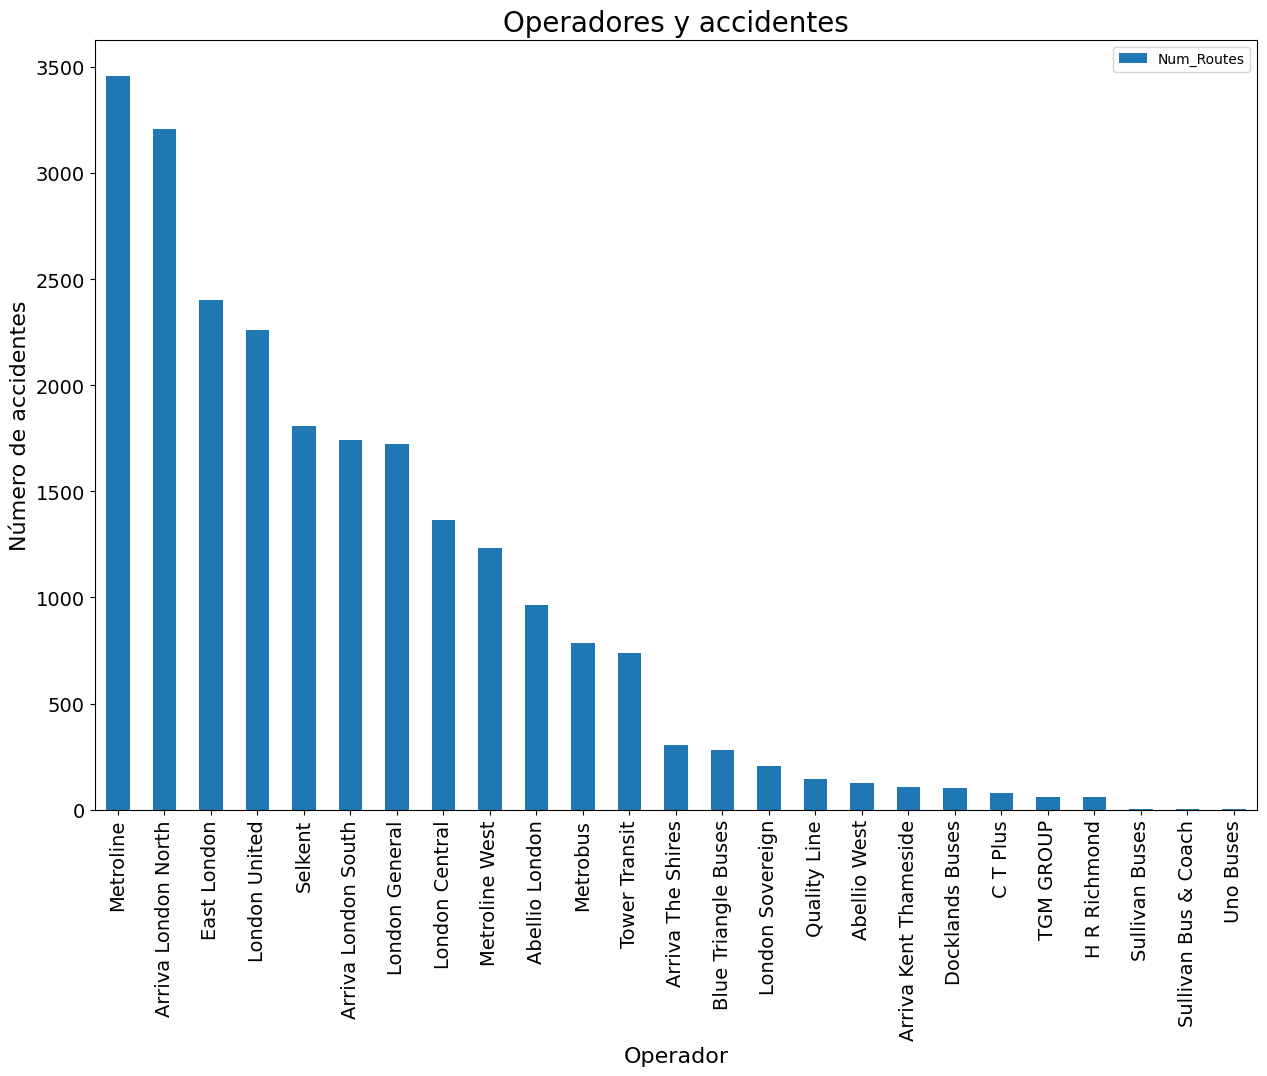

In [12]:
operatorQuantityRoute.plot(kind='bar', figsize=(15,10), fontsize=14)
plt.title('Operadores y accidentes', fontsize=20)
plt.xlabel('Operador', fontsize=16)
plt.ylabel('Número de accidentes', fontsize=16)
plt.show()

### Grafica de pastel con los operadores y sus accidentes

In [13]:
operatorQuantityRoute= df["Operator"].value_counts()

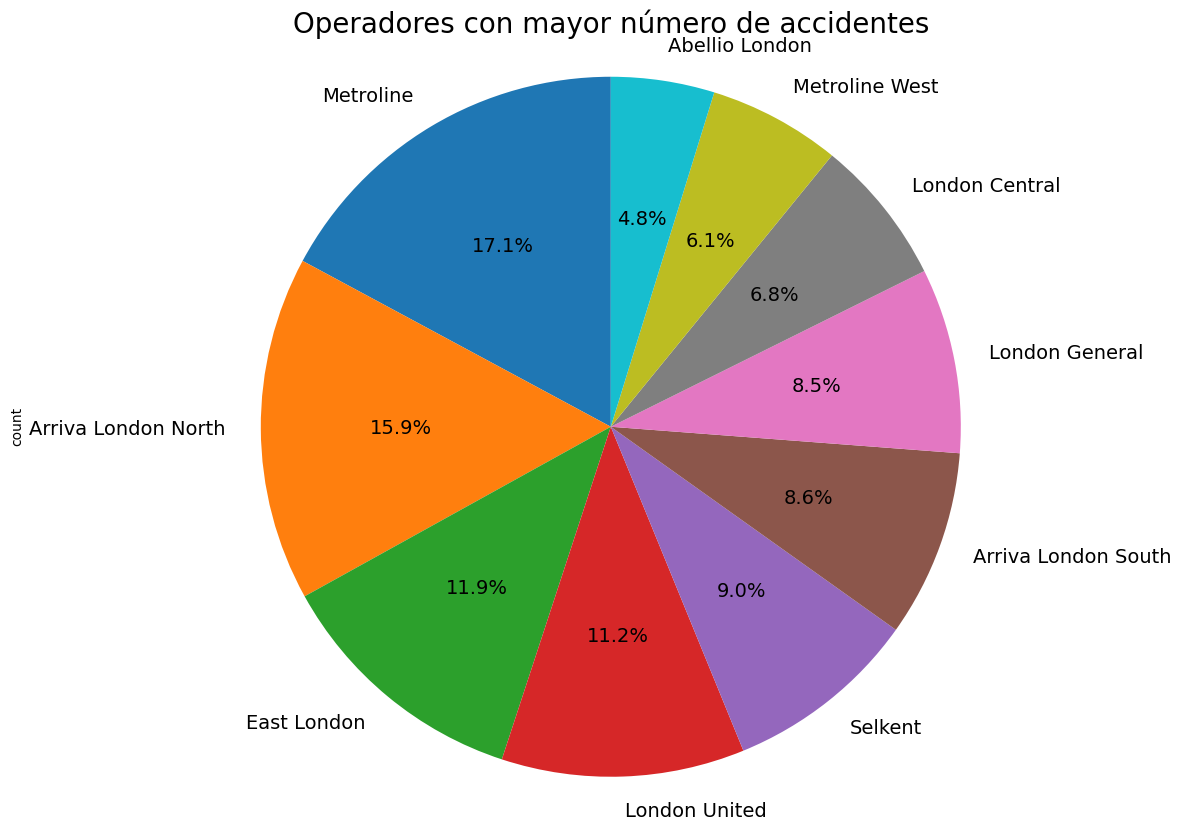

In [14]:
operatorQuantityRoute[0:10].plot(
    kind="pie",
    y="Operator",
    figsize=(15, 10),
    autopct="%1.1f%%",
    startangle=90,
    shadow=False,
    labels=operatorQuantityRoute.index,
    legend=False,
    fontsize=14,
)
plt.title("Operadores con mayor número de accidentes", fontsize=20)
plt.axis("equal")
plt.show()

### Accidentes del operador con mayor numero de incidentes

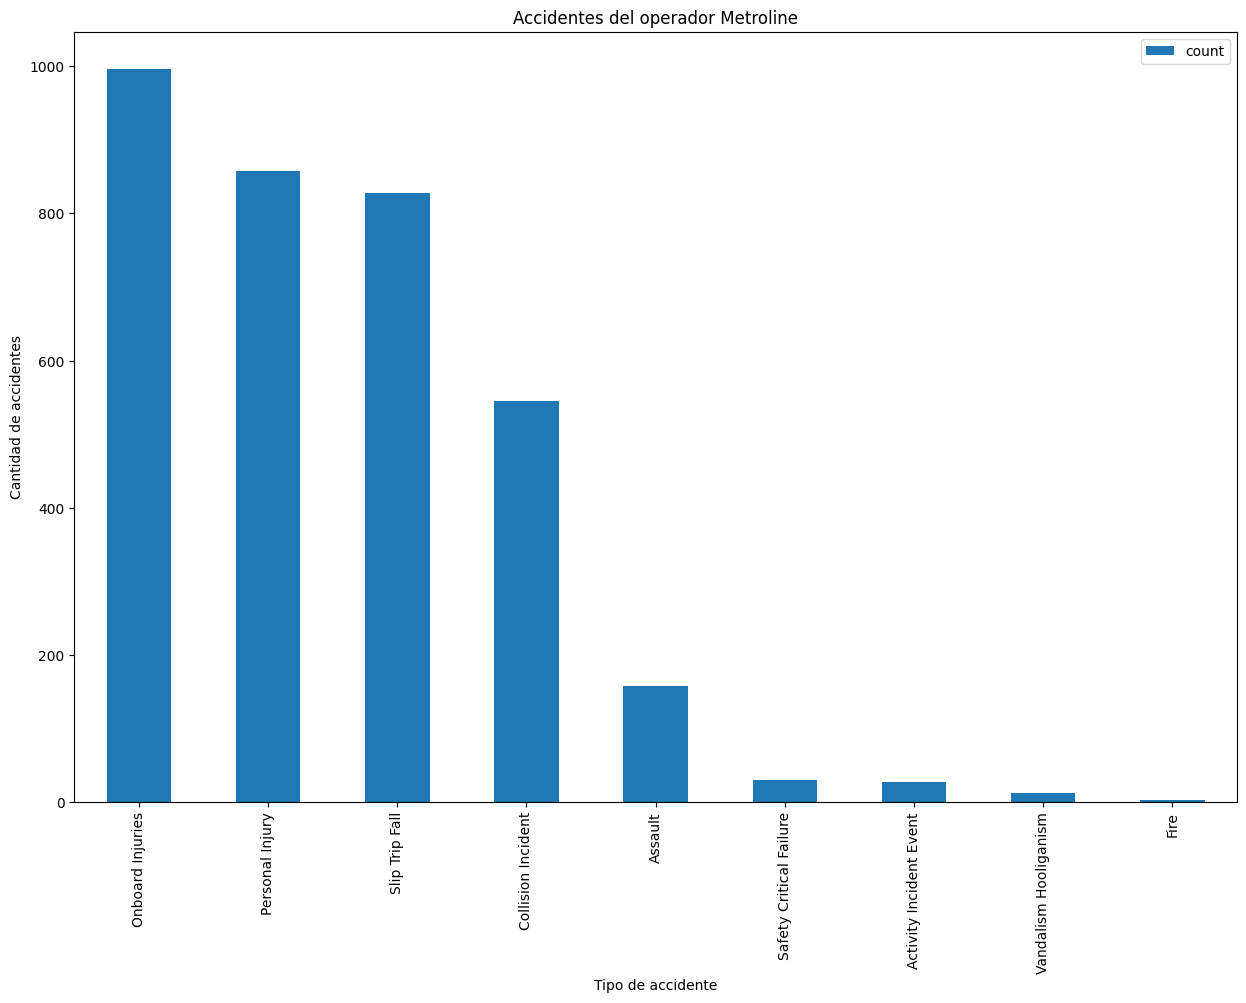

In [15]:
df[df["Operator"] == "Metroline"]["Incident Event Type"].value_counts().plot(
    kind="bar", stacked=True, legend=True, figsize=(15, 10)
)
plt.title("Accidentes del operador Metroline")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Tipo de accidente")
plt.show()

## Año con mas accidentes registrados

In [16]:
yearAccidentsMax = df["Year"].value_counts().idxmax()
yearAccidentsMax

2017

## Grafica con el numero total de accidentes por año

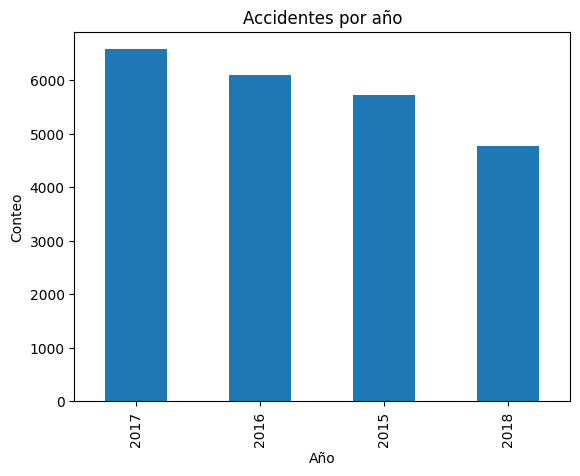

In [17]:
yearAccidents = df["Year"].value_counts()
ax = yearAccidents.plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Año")
plt.ylabel("Conteo")
plt.title("Accidentes por año")
plt.show()

## Numero total de casos por Municipio


In [18]:
insidentsTotal = df["Borough"].value_counts()
insidentsTotal

Borough
Westminster             1571
Southwark               1107
Lambeth                 1107
Croydon                 1032
Lewisham                1006
Barnet                   922
Camden                   900
Brent                    887
Ealing                   863
Greenwich                832
Haringey                 831
Hackney                  796
Islington                769
Bromley                  673
Havering                 652
Hounslow                 642
Newham                   634
Hammersmith & Fulham     632
Enfield                  584
None London Borough      561
Not specified            553
Wandsworth               551
Waltham Forest           526
Hillingdon               517
Redbridge                470
Kingston upon Thames     451
Tower Hamlets            435
Bexley                   414
Richmond Upon Thames     403
Harrow                   384
Barking & Dagenham       374
Kensington & Chelsea     334
Merton                   309
City of London           243
Sutton

## Municipio con mas accidentes registrados


In [19]:
maxIncident = insidentsTotal.max()
nameOfBorough = insidentsTotal.idxmax()

In [20]:
maxIncident, nameOfBorough

(1571, 'Westminster')

## Graficamos los municipios con mas numero de accidentes


In [21]:
import matplotlib.pyplot as plt

In [22]:
topFiveValues = insidentsTotal.nlargest(5)

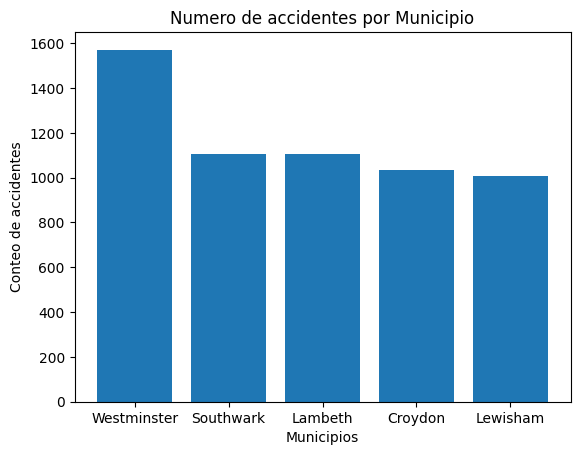

In [23]:
plt.bar(topFiveValues.index, topFiveValues.values)
plt.xlabel("Municipios")
plt.ylabel("Conteo de accidentes")
plt.title("Numero de accidentes por Municipio")
plt.show()

## Municipios con menor numero de accidentes registrados


In [24]:
topFiveSmallValues = insidentsTotal.nsmallest(4)

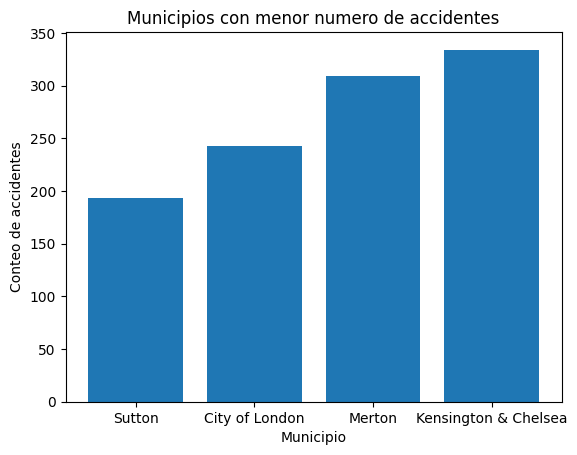

In [25]:
plt.bar(topFiveSmallValues.index, topFiveSmallValues.values)
plt.xlabel("Municipio")
plt.ylabel("Conteo de accidentes")
plt.title("Municipios con menor numero de accidentes")
plt.show()

## Rangos de edad afectados


In [26]:
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [27]:
victimsAge = df["Victims Age"].value_counts()
victimsAge

Victims Age
Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: count, dtype: int64

## Graficar los ragos de edades afectados


In [28]:
topAgeValues = victimsAge.nlargest(5)
topAgeValues

Victims Age
Adult      10754
Unknown     7135
Elderly     2769
Child       2181
Youth        319
Name: count, dtype: int64

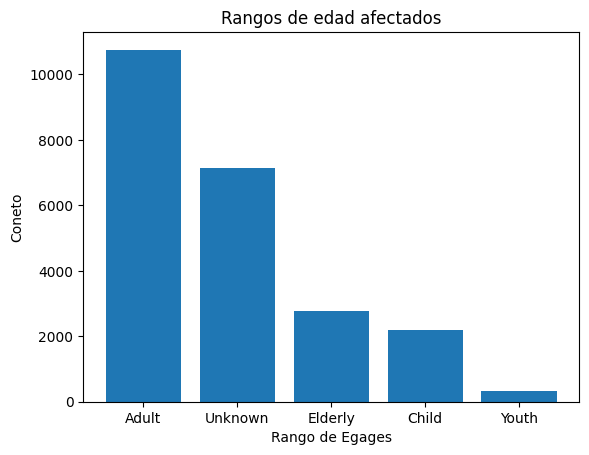

In [29]:
plt.bar(topAgeValues.index, topAgeValues.values)
plt.xlabel("Rango de Egages")
plt.ylabel("Coneto")
plt.title("Rangos de edad afectados")
plt.show()

## Grafico de pastel segun los rangos de edad afectados


In [30]:
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [31]:
porcentVictimgsAge = df["Victims Age"].value_counts(normalize=True) * 100
porcentVictimgsAge

Victims Age
Adult      46.437516
Unknown    30.810087
Elderly    11.956991
Child       9.417912
Youth       1.377494
Name: proportion, dtype: float64

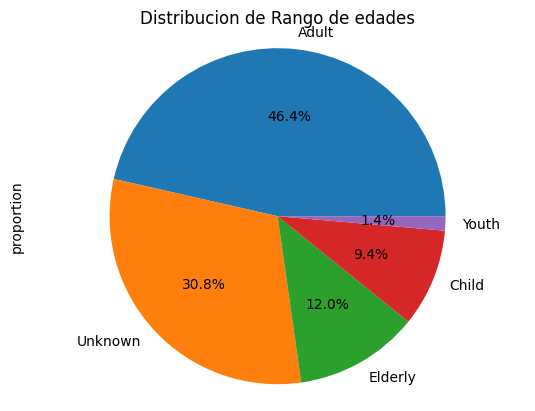

In [32]:
porcentVictimgsAge.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribucion de Rango de edades")
plt.show()

## Lesiones mas comunes


In [33]:
injuryValues = df["Injury Result Description"].value_counts()
injuryValues

Injury Result Description
Injuries treated on scene                                          17336
Taken to Hospital  Reported Serious Injury or Severity Unknown     2994
Reported Minor Injury - Treated at Hospital                         2786
Fatal                                                                 42
Name: count, dtype: int64

## Grafico de pastel las lesiones mas comunes


In [34]:
injuryValuesPorcent = df["Injury Result Description"].value_counts(normalize=True) * 100
injuryValuesPorcent

Injury Result Description
Injuries treated on scene                                          74.859660
Taken to Hospital  Reported Serious Injury or Severity Unknown    12.928578
Reported Minor Injury - Treated at Hospital                        12.030400
Fatal                                                               0.181363
Name: proportion, dtype: float64

C:\Users\Kevin López\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


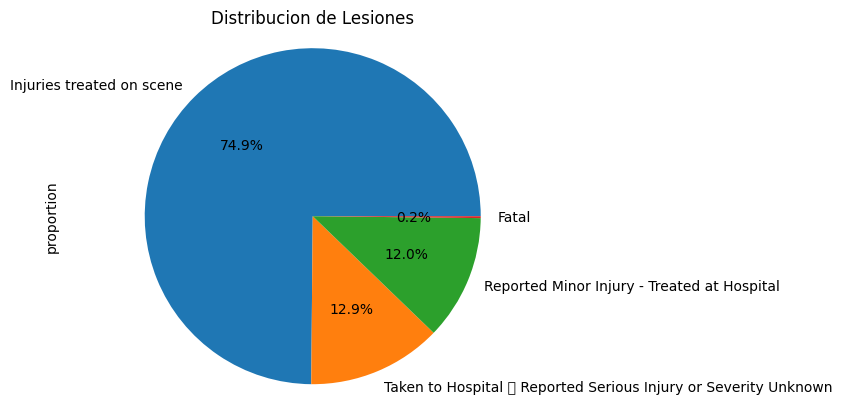

In [35]:
injuryValuesPorcent.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribucion de Lesiones")
plt.show()

## Sexo mas afectado en los accidentes


In [36]:
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [37]:
victimsSex = df["Victims Sex"].value_counts()
victimsSex

Victims Sex
Female     11847
Male        7709
Unknown     3602
Name: count, dtype: int64

## Grafica de barras de sexos afectados


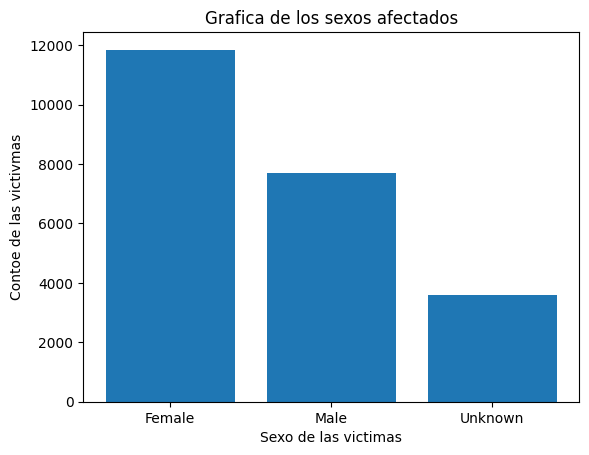

In [38]:
plt.bar(victimsSex.index, victimsSex.values)
plt.xlabel("Sexo de las victimas")
plt.ylabel("Contoe de las victivmas")
plt.title("Grafica de los sexos afectados")
plt.show()

## Grafico de pastel en base a los sexos mas afectados


In [39]:
victimsSexPorcent = df["Victims Sex"].value_counts(normalize=True) * 100
victimsSexPorcent

Victims Sex
Female     51.157267
Male       33.288712
Unknown    15.554020
Name: proportion, dtype: float64

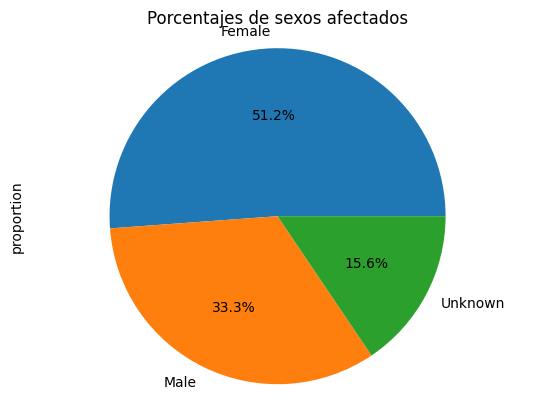

In [40]:
victimsSexPorcent.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Porcentajes de sexos afectados")
plt.show()

## Tipos de incidentes


In [41]:
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [42]:
incidentsEventType = df["Incident Event Type"].value_counts()
incidentsEventType

Incident Event Type
Slip Trip Fall             6981
Onboard Injuries           6563
Personal Injury            4596
Collision Incident         4166
Assault                     590
Activity Incident Event     114
Vandalism Hooliganism        73
Safety Critical Failure      66
Fire                          6
Robbery                       3
Name: count, dtype: int64

## Grafica de barras por accidentes mas comunes


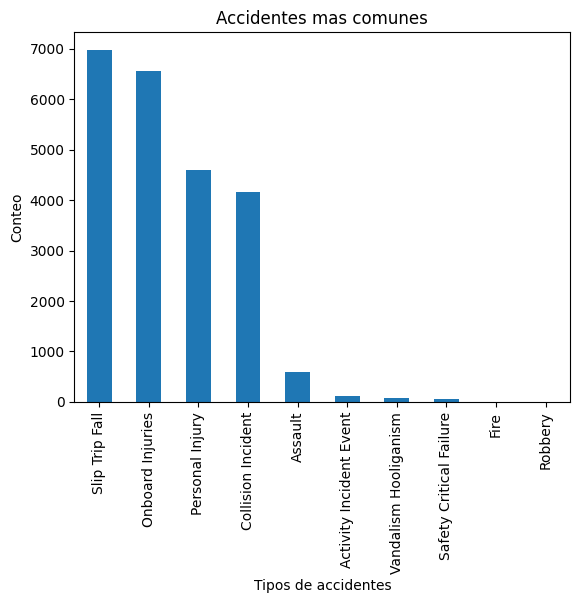

In [43]:
ax = incidentsEventType.plot(kind="bar")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Tipos de accidentes")
plt.ylabel("Conteo")
plt.title("Accidentes mas comunes")
plt.show()

## Grafica de tipo de accidentrees en el año con mayor accidentes registrados

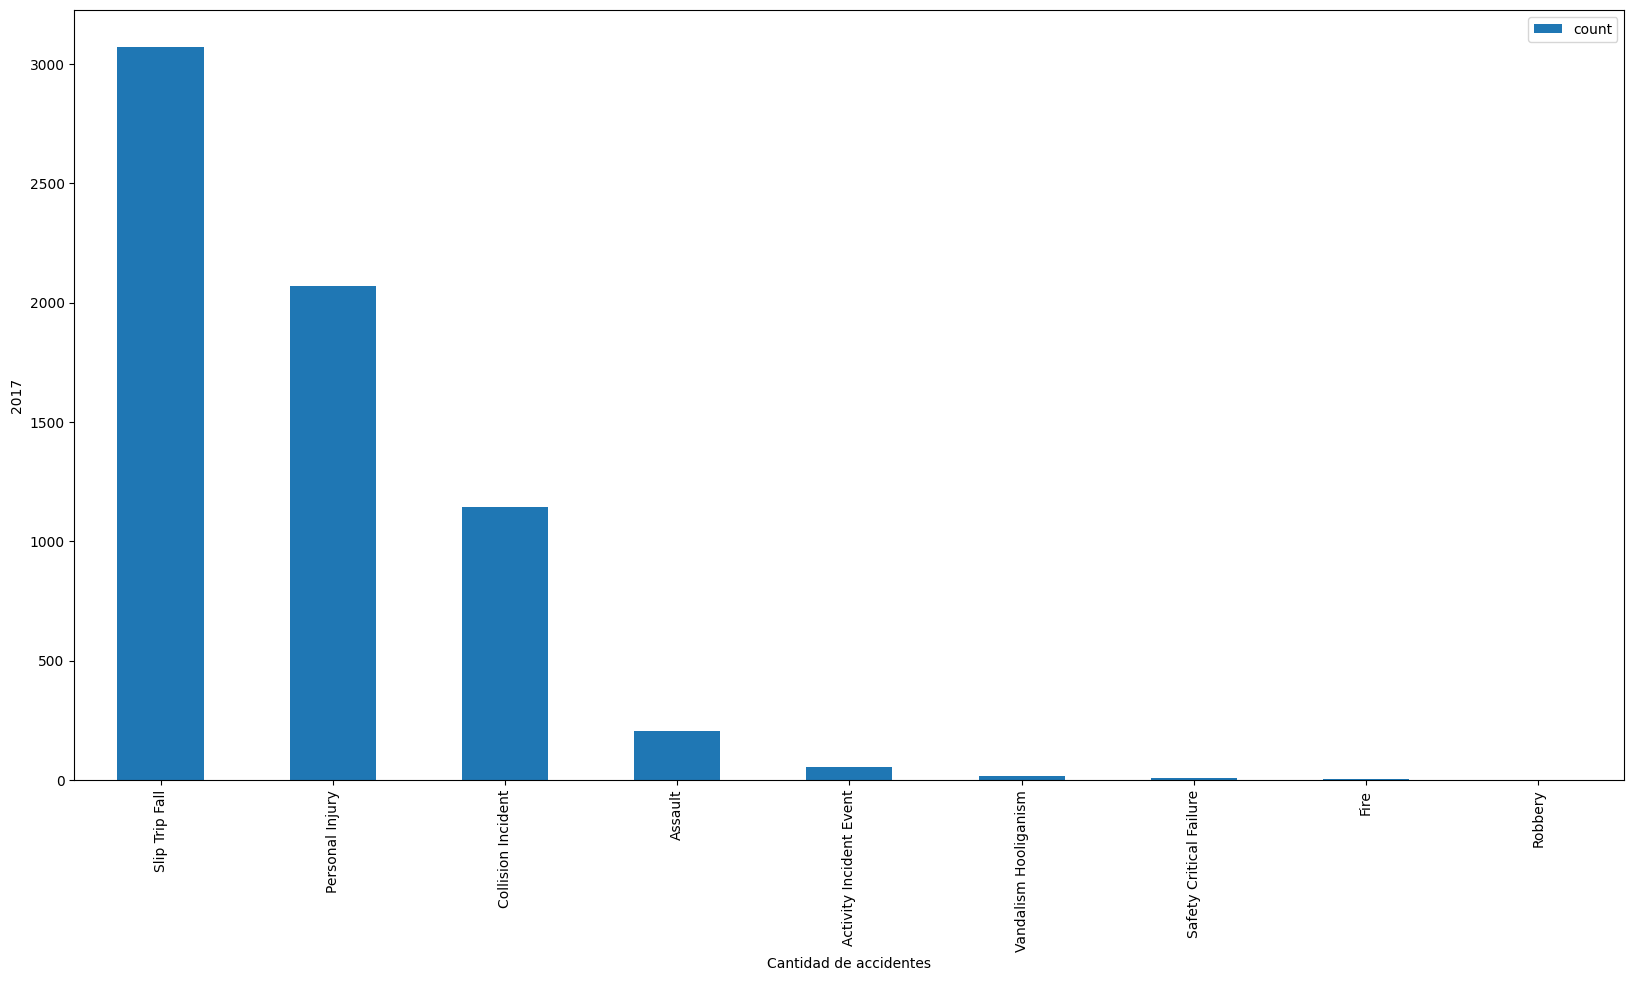

In [44]:
df[df["Year"] == yearAccidentsMax]["Incident Event Type"].value_counts().idxmax()
df[df["Year"] == yearAccidentsMax]["Incident Event Type"].value_counts().plot(
    kind="bar", stacked=True, legend=True, figsize=(20, 10)
)
plt.xlabel("Cantidad de accidentes")
plt.ylabel("2017")
plt.show()

## Mes con mayor numero de accidentes y tipos de accidentes

In [45]:
dates = fechas = df['Date Of Incident']

#### cambiar formato de las fechas a dia, mes y año

In [46]:
dates = pd.to_datetime(dates, format="%d/%m/%Y")
newDate = dates.dt.strftime("%d/%m/%Y")
newDate[2345:2350]

2345    01/03/2015
2346    01/03/2015
2347    01/03/2015
2348    01/03/2015
2349    01/03/2015
Name: Date Of Incident, dtype: object

In [47]:
monthDate = dates.dt.month
yearDate = dates.dt.year
dayDate = dates.dt.day

#### Agregamos columnas de mes, dia y años al DF

In [48]:
df['Month'] = monthDate
df['Day'] = dayDate
df.head()


,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age,Month,Day
0,2015,01/01/2015,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child,1,1
1,2015,01/01/2015,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown,1,1
2,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,1
3,2015,01/01/2015,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital  Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly,1,1
4,2015,01/01/2015,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly,1,1


#### Se crea un nuevo DF con las columnas que se utilizaran

In [49]:
df1 = pd.DataFrame({"Day": dayDate, "Month": monthDate, "Year": yearDate})
df1[18266:18270]

,Day,Month,Year
18266,1,12,2017
18267,1,12,2017
18268,1,12,2017
18269,1,12,2017


#### Retornar los meses solo del año 2017

In [50]:
df2 = df1[df1['Year'] == 2017]['Month'].value_counts()
df2 = pd.DataFrame({'Month':df2.index, 'Quantity':df2.values, 'Year':2017})
df2

,Month,Quantity,Year
0,7,650,2017
1,10,621,2017
2,11,584,2017
3,3,579,2017
4,4,563,2017
5,8,563,2017
6,9,549,2017
7,6,516,2017
8,12,516,2017
9,5,510,2017


#### Graficar accidentes y tipos de accidentes del año 2017

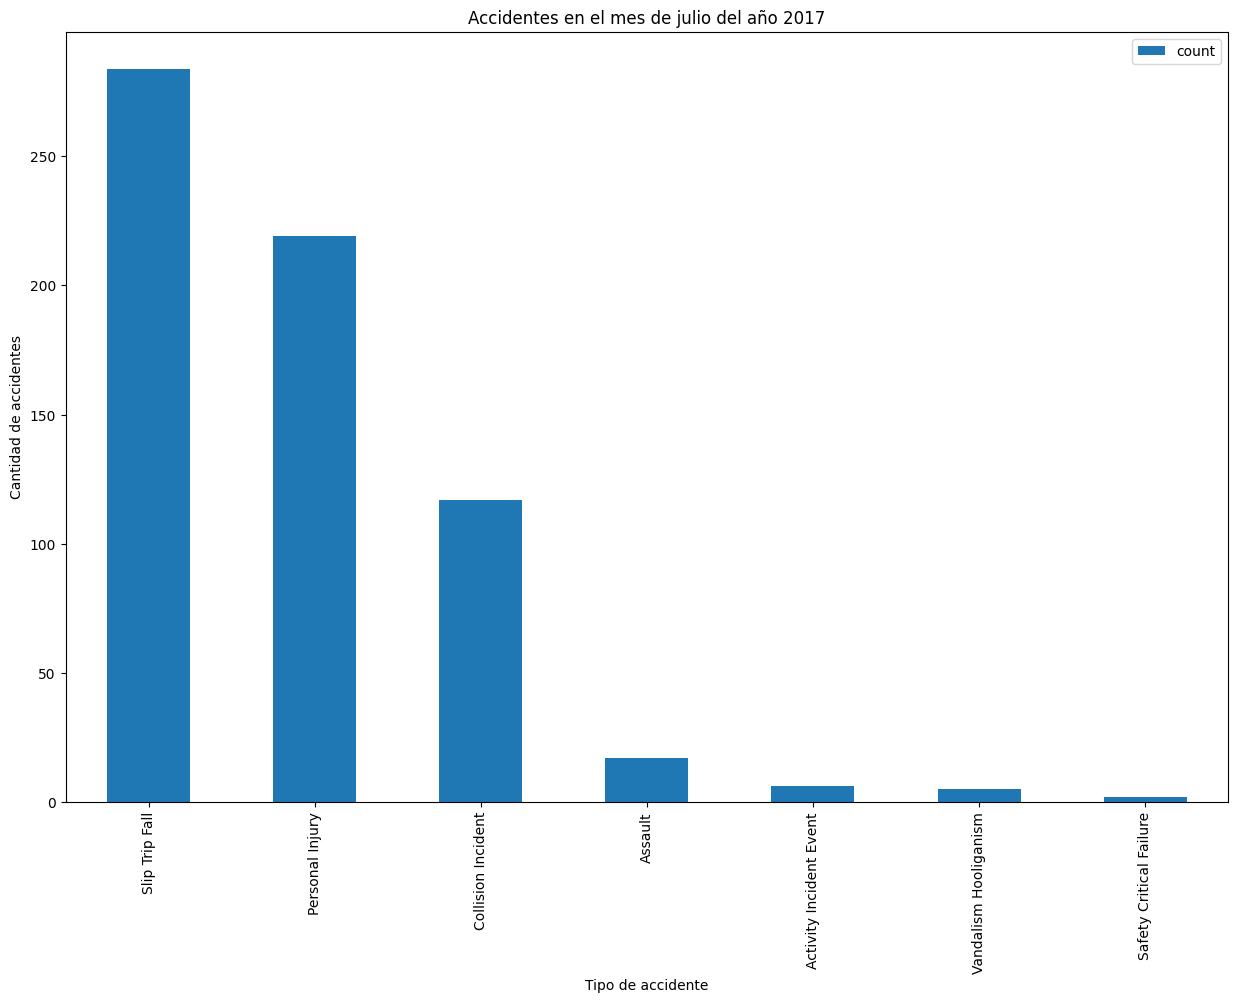

In [51]:
df[(df["Year"] == 2017) & (df["Month"] == 7)]["Incident Event Type"].value_counts().plot(
    kind="bar", stacked=True, legend=True, figsize=(15, 10)
)
plt.title("Accidentes en el mes de julio del año 2017")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Tipo de accidente")
plt.show()